In [43]:
import numpy as np
from matplotlib import pyplot as plt

In [132]:
n=61
m=12
n_vec=np.array([58,2,1])
ITER_MAX=20
r_vec=np.array([10,1.1,1.1])
r=np.sum(r_vec)
prior_mean=r_vec/r

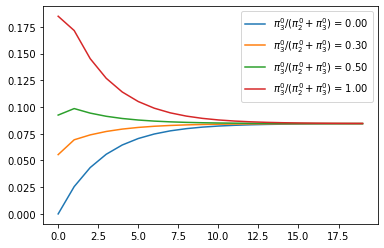

In [134]:
r3_vec=np.array([0,0.3,0.5,1]) #initialization with pi3/(pi2+pi3)
for i in range(len(r3_vec)):
    r3=r3_vec[i]
    pi_t=np.zeros((ITER_MAX,3))
    pi_t[:,0]=(r_vec[0]+n_vec[0]-1)/(r+n+m-3)
    #pi_t[0] do not need to be updated!
    D=r+n+m-3
    pi03=(1-(r_vec[0]+n_vec[0]-1)/D)*r3
    pi02=(1-(r_vec[0]+n_vec[0]-1)/D)*(1-r3)
    pi_t[0,1:3]=np.array([pi02,pi03])
    #we only need to inspect pi_3
    for t in range(ITER_MAX-1):
        pit=pi_t[t,:]
        m3t=m*pit[2]/(pit[1]+pit[2])
        m2t=m-m3t
        #print(m2t,m3t)
        pi_t[t+1,1:3]=np.array([(r_vec[1]+n_vec[1]+m2t)/D,(r_vec[2]+n_vec[2]+m3t)/D])  
    plt.plot(pi_t[:,2],label="$π^0_3/(π^0_2+π^0_3)$ = %.2f" % r3)
    plt.legend()

#### approximation of posterior mode:

In [141]:
print(pi_t[ITER_MAX-1,:])
print(pi_t[ITER_MAX-1,2]/pi_t[ITER_MAX-1,1])

[0.81508516 0.12460917 0.08463657]
0.679216196457037


#### prior mode:

In [143]:
pm=(r_vec-1)/(r-3)
print(pm)
print(pm[2]/pm[1])

[0.97826087 0.01086957 0.01086957]
1.0


#### posterior mode with only $y_c$

In [144]:
posy=(n_vec+r_vec)/(n+r)
print(posy)
print(posy[2]/posy[1])

[0.92896175 0.04234973 0.02868852]
0.6774193548387097


Note that $\pi_3/\pi_2$ of posterior mode with only $y_c$ and of the EM result are similar. This means the partial outcomes $x_p$ mainly contributes to estimating ratio between $\pi_1$ and $\pi_2+\pi_3$ instead of distinguishing between $\pi_2$ and $\pi_3$.